# TVA

In [2]:
import warnings

warnings.filterwarnings("ignore")

from src import utils
from src.utils import VotingSchemas, VotingArray
from src.outcomes import *
from src.happiness_level import HappinessLevel
from src.strategic_voting_risk import StrategicVoting
import os
import numpy as np
import matplotlib.pyplot as plt

## Input Voting Preference

In [3]:
path_voting = "input/voting_result.json"
if "env" in os.environ:
    if os.environ["env"] == "docker":
        path_voting = "/input/voting_result.json"
voting = utils.read_voting(path_voting, table_name="four_candidates")[:,:7]
mapping = {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E'}
voting = np.vectorize(mapping.get)(voting)
display(voting.view(VotingArray).to_pandas())

,voter_0,voter_1,voter_2,voter_3,voter_4,voter_5,voter_6
preference_0,B,D,C,D,B,B,A
preference_1,C,A,D,A,C,A,C
preference_2,A,C,B,C,A,C,B
preference_3,D,B,A,B,D,D,D


## Voting Outcomes

In [4]:
outcomes = all_schemas_outcomes(voting)
outcomes_df = all_schemas_outcomes_to_pandas(outcomes)
outcomes_df

,A,B,C,D,Winner
Plurality Voting,1,3,1,2,B
Voting for Two,4,3,4,3,A
Veto Voting,6,5,7,3,C
Borda Voting,11,11,12,8,C


## Happiness Level

Voters Happiness Level


,Happiness Level
voter_0,1.000000
voter_1,0.000000
voter_2,0.410487
voter_3,0.000000
voter_4,1.000000
voter_5,1.000000
voter_6,0.410487



Overall Happiness Level: 3.8209731815334376

Happiness Level Distribution


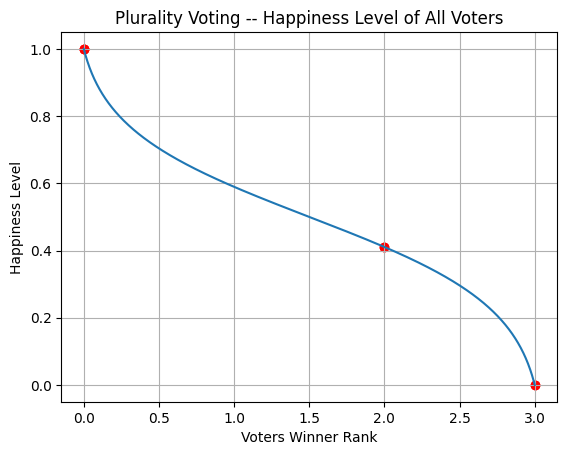


Histogram of Happiness Level


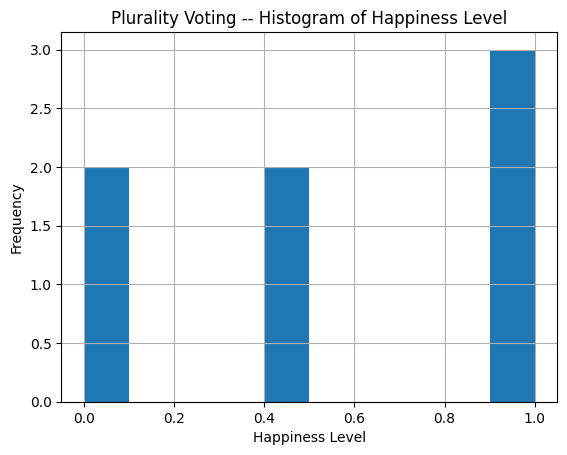

In [5]:
pv_h = HappinessLevel(
    voting,
    outcomes[VotingSchemas.PLURALITY_VOTING.value].winner,
    VotingSchemas.PLURALITY_VOTING,
).run(True)

vt_h = HappinessLevel(
    voting,
    outcomes[VotingSchemas.VOTING_FOR_TWO.value].winner,
    VotingSchemas.VOTING_FOR_TWO,
).run()

vv_h = HappinessLevel(
    voting,
    outcomes[VotingSchemas.VETO_VOTING.value].winner,
    VotingSchemas.VETO_VOTING,
).run()

bv_h = HappinessLevel(
    voting,
    outcomes[VotingSchemas.BORDA_VOTING.value].winner,
    VotingSchemas.BORDA_VOTING,
).run()

## Strategic Voting

In [6]:
plurality_best = StrategicVoting(voting, pv_h, plurality_outcome).run().best
fortwo_best = StrategicVoting(voting, vt_h, for_two_outcome).run().best
borda_best = StrategicVoting(voting, bv_h, borda_outcome).run().best
veto_best = StrategicVoting(voting, vv_h, veto_outcome).run().best

plurality_risk = StrategicVoting(voting, pv_h, plurality_outcome).run(True).risk
fortwo_risk= StrategicVoting(voting, vt_h, for_two_outcome).run().risk
borda_risk = StrategicVoting(voting, bv_h, borda_outcome).run(True).risk
veto_risk = StrategicVoting(voting, vv_h, veto_outcome).run().risk 

Strategic Voting


,voter,strategic_voting,new_result,strategic_H,previous_H,strategic_overall_H,previous_overall_H


Best Strategic Voting


,voter,strategic_voting,new_result,strategic_H,previous_H,strategic_overall_H,previous_overall_H


Risk: 0.0
Strategic Voting


,voter,strategic_voting,new_result,strategic_H,previous_H,strategic_overall_H,previous_overall_H
0,0,"[B, D, C, A]",B,1.000000,0.589513,3.820973,4.0
1,1,"[A, D, C, B]",A,0.589513,0.410487,3.589513,4.0
2,1,"[A, D, B, C]",A,0.589513,0.410487,3.589513,4.0
3,3,"[A, D, C, B]",A,0.589513,0.410487,3.589513,4.0
4,3,"[A, D, B, C]",A,0.589513,0.410487,3.589513,4.0
5,4,"[B, D, C, A]",B,1.000000,0.589513,3.820973,4.0
6,5,"[B, A, D, C]",A,0.589513,0.410487,3.589513,4.0
7,5,"[B, D, A, C]",B,1.000000,0.410487,3.820973,4.0
8,5,"[A, B, C, D]",A,0.589513,0.410487,3.589513,4.0
9,5,"[A, B, D, C]",A,0.589513,0.410487,3.589513,4.0


Best Strategic Voting


,voter,strategic_voting,new_result,strategic_H,previous_H,strategic_overall_H,previous_overall_H
0,0,"[B, D, C, A]",B,1.000000,0.589513,3.820973,4.0
5,4,"[B, D, C, A]",B,1.000000,0.589513,3.820973,4.0
7,5,"[B, D, A, C]",B,1.000000,0.410487,3.820973,4.0
13,6,"[A, D, C, B]",A,1.000000,0.589513,3.589513,4.0
1,1,"[A, D, C, B]",A,0.589513,0.410487,3.589513,4.0
3,3,"[A, D, C, B]",A,0.589513,0.410487,3.589513,4.0


Risk: 0.3631711364110937


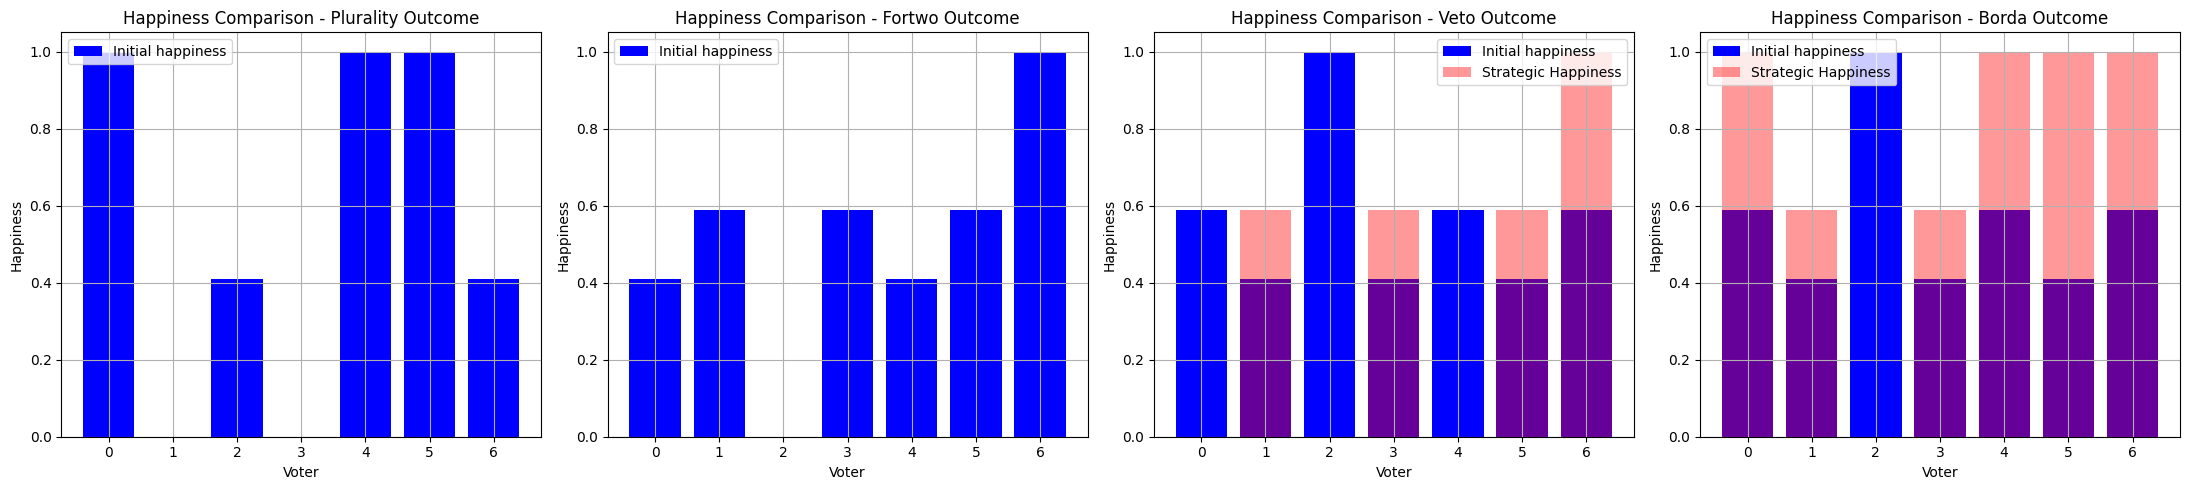

In [10]:
fig, axs = plt.subplots(1,4, figsize=(22, 5))

outcomes = [
    (plurality_best, pv_h, 'Plurality'),
    (fortwo_best, vt_h, 'Fortwo'),
    (veto_best, vv_h, 'Veto'),
    (borda_best, bv_h, 'Borda')
]

for ax, (best, h, title) in zip(axs.flatten(), outcomes):
    ax.bar(range(h.voter.shape[0]), h.voter, color='blue', label='Initial happiness')

    if not best.empty:
        ax.bar(best['voter'], best['strategic_H'], color='red', alpha=0.4, label='Strategic Happiness')

    ax.set_title(f'Happiness Comparison - {title} Outcome')
    ax.set_xlabel('Voter')
    ax.set_ylabel('Happiness')
    ax.grid(True)
    ax.legend()

plt.tight_layout()
plt.show()



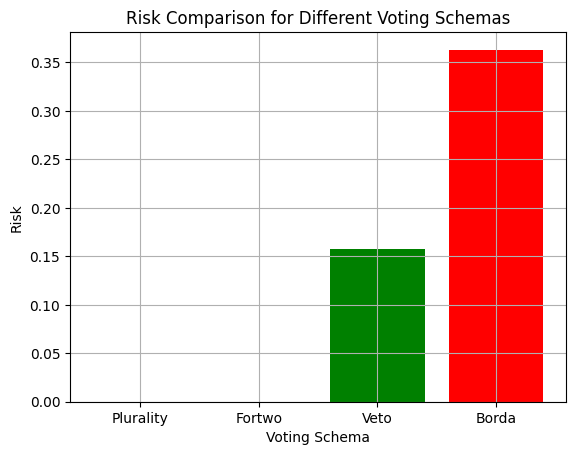

In [8]:
risks = [plurality_risk, fortwo_risk, veto_risk, borda_risk]
outcomes = ['Plurality', 'Fortwo', 'Veto', 'Borda']

plt.bar(outcomes, risks, color=['blue', 'orange', 'green', 'red'])
plt.title('Risk Comparison for Different Voting Schemas')
plt.xlabel('Voting Schema')
plt.ylabel('Risk')
plt.grid(True)
plt.show()